In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("../resources/diabetes_prediction_dataset.csv")
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
print(data[data.duplicated()])

       gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6                  159        

In [15]:
data.drop_duplicates(inplace=True)
len(data[data.duplicated() == True])

0

In [16]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [17]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [18]:
# Calculate Q1 (25th percentile)
Q1 = data['bmi'].quantile(0.25)

# Calculate Q3 (75th percentile)
Q3 = data['bmi'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower bound and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]

# Display outliers
print("Outliers based on BMI")
print(outliers)
print(lower_bound)
print(upper_bound)


Outliers based on BMI
       gender   age  hypertension  heart_disease smoking_history    bmi  \
11     Female  54.0             0              0          former  54.70   
39     Female  34.0             0              0           never  56.43   
59     Female  67.0             0              0           never  63.48   
93       Male  38.0             0              0           never  55.61   
98     Female  30.0             0              0         No Info  50.13   
...       ...   ...           ...            ...             ...    ...   
99933  Female   5.0             0              0         No Info  13.34   
99948  Female  56.0             1              0          former  39.62   
99953  Female  59.0             1              0            ever  60.52   
99960  Female  47.0             0              0          former  45.15   
99993  Female  40.0             0              0           never  40.69   

       HbA1c_level  blood_glucose_level  diabetes  
11             6.0       

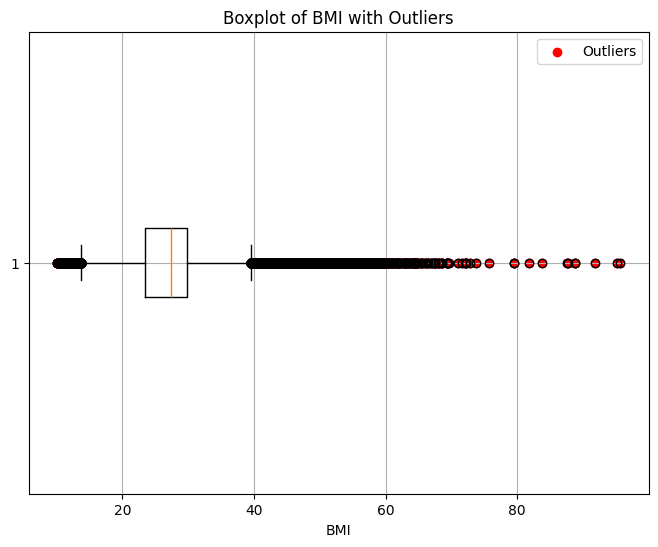

In [19]:
# Create a boxplot of BMI values
plt.figure(figsize=(8, 6))
plt.boxplot(data['bmi'], vert=False)
plt.xlabel('BMI')
plt.title('Boxplot of BMI with Outliers')
plt.grid(True)

# Highlight outliers
plt.scatter(outliers['bmi'], [1] * len(outliers), color='red', label='Outliers')
plt.legend()

plt.show()


In [20]:
# Filter out outliers from the original DataFrame
clean_data = data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]

# Display the cleaned DataFrame
print("Cleaned DataFrame without outliers:")
print(clean_data)

Cleaned DataFrame without outliers:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0          

In [21]:
# Define the range of BMI values
bmi_range = np.arange(data['bmi'].min(), data['bmi'].max(), 0.1)

# Initialize a list to store tuples of (BMI, average diabetes occurrence)
bmi_diabetes_avg = []

# Iterate through each BMI value
for bmi in bmi_range:
    # Filter the data for individuals with BMI approximately equal to the current BMI value
    filtered_data = data[(data['bmi'] >= bmi - 0.05) & (data['bmi'] < bmi + 0.05)]
    
    # Check if there are any data points for the current BMI value
    if len(filtered_data) > 0:
        # Calculate the average diabetes occurrence for the filtered data
        avg_diabetes_occurrence = filtered_data['diabetes'].mean()
        
        # Append the tuple of (BMI, average diabetes occurrence) to the list
        bmi_diabetes_avg.append((bmi, avg_diabetes_occurrence))

# Sort the list of tuples based on the average diabetes occurrence
sorted_bmi_diabetes_avg = sorted(bmi_diabetes_avg, key=lambda x: x[1], reverse=True)

# Display the sorted list
for bmi, avg_diabetes in sorted_bmi_diabetes_avg:
    print(f"BMI: {bmi}, Average Diabetes Occurrence: {avg_diabetes}")

BMI: 53.50999999999984, Average Diabetes Occurrence: 1.0
BMI: 56.609999999999836, Average Diabetes Occurrence: 1.0
BMI: 57.30999999999983, Average Diabetes Occurrence: 1.0
BMI: 57.70999999999983, Average Diabetes Occurrence: 1.0
BMI: 58.00999999999983, Average Diabetes Occurrence: 1.0
BMI: 59.309999999999825, Average Diabetes Occurrence: 1.0
BMI: 60.80999999999982, Average Diabetes Occurrence: 1.0
BMI: 61.109999999999815, Average Diabetes Occurrence: 1.0
BMI: 61.90999999999981, Average Diabetes Occurrence: 1.0
BMI: 62.00999999999981, Average Diabetes Occurrence: 1.0
BMI: 63.00999999999981, Average Diabetes Occurrence: 1.0
BMI: 63.70999999999981, Average Diabetes Occurrence: 1.0
BMI: 64.8099999999998, Average Diabetes Occurrence: 1.0
BMI: 66.9099999999998, Average Diabetes Occurrence: 1.0
BMI: 67.3099999999998, Average Diabetes Occurrence: 1.0
BMI: 68.6099999999998, Average Diabetes Occurrence: 1.0
BMI: 69.30999999999979, Average Diabetes Occurrence: 1.0
BMI: 69.4099999999998, Average D

In [22]:
# Filter the list of tuples to include only those with avg_diabetes equal to 1
bmi_diabetes_1 = [(bmi, avg_diabetes) for bmi, avg_diabetes in bmi_diabetes_avg if avg_diabetes > .5]

# Extract the BMI values from the filtered list
bmi_values_diabetes_1 = [bmi for bmi, _ in bmi_diabetes_1]

# Sort the BMI values from smallest to largest
sorted_bmi_values_diabetes_1 = sorted(bmi_values_diabetes_1)

# Display the sorted BMI values
print("BMI values with average diabetes occurrence > .5 (sorted):", sorted_bmi_values_diabetes_1)

bmi_diabetes_avg

BMI values with average diabetes occurrence > .5 (sorted): [46.50999999999987, 48.40999999999986, 52.209999999999845, 53.50999999999984, 53.80999999999984, 56.009999999999835, 56.609999999999836, 56.80999999999983, 56.90999999999983, 57.30999999999983, 57.70999999999983, 57.809999999999825, 58.00999999999983, 58.10999999999983, 58.409999999999826, 59.309999999999825, 60.00999999999982, 60.30999999999982, 60.80999999999982, 61.109999999999815, 61.90999999999981, 62.00999999999981, 63.00999999999981, 63.70999999999981, 64.20999999999981, 64.8099999999998, 66.9099999999998, 67.3099999999998, 68.6099999999998, 69.30999999999979, 69.4099999999998, 69.7099999999998, 72.20999999999978, 72.90999999999978, 81.70999999999975, 83.70999999999974, 88.70999999999972]


[(10.01, 0.0),
 (10.11, 0.0),
 (10.209999999999999, 0.0),
 (10.309999999999999, 0.0),
 (10.409999999999998, 0.0),
 (10.509999999999998, 0.0),
 (10.609999999999998, 0.0),
 (10.709999999999997, 0.0),
 (10.809999999999997, 0.0),
 (10.909999999999997, 0.0),
 (11.009999999999996, 0.16666666666666666),
 (11.109999999999996, 0.0),
 (11.209999999999996, 0.0),
 (11.309999999999995, 0.0),
 (11.409999999999995, 0.0),
 (11.509999999999994, 0.0),
 (11.609999999999994, 0.0),
 (11.709999999999994, 0.0),
 (11.809999999999993, 0.0),
 (11.909999999999993, 0.25),
 (12.009999999999993, 0.0),
 (12.109999999999992, 0.0),
 (12.209999999999992, 0.0),
 (12.309999999999992, 0.0),
 (12.409999999999991, 0.0),
 (12.509999999999991, 0.0),
 (12.60999999999999, 0.0),
 (12.70999999999999, 0.0),
 (12.80999999999999, 0.0),
 (12.90999999999999, 0.05555555555555555),
 (13.00999999999999, 0.0),
 (13.109999999999989, 0.0),
 (13.209999999999988, 0.07692307692307693),
 (13.309999999999988, 0.034482758620689655),
 (13.40999999

In [26]:
# Filter the list of tuples to include only those with avg_diabetes equal to 1
bmi_diabetes_2 = [(bmi, avg_diabetes) for bmi, avg_diabetes in bmi_diabetes_avg if bmi >= 18.5]
bmi_diabetes_2 = [(bmi, avg_diabetes) for bmi, avg_diabetes in bmi_diabetes_avg if bmi <= 40]
bmi_diabetes_2 = [(bmi, avg_diabetes) for bmi, avg_diabetes in bmi_diabetes_avg if avg_diabetes > .5]

# Extract the BMI values from the filtered list
bmi_values_diabetes_2 = [bmi for bmi, _ in bmi_diabetes_2]

# Sort the BMI values from smallest to largest
sorted_bmi_values_diabetes_2 = sorted(bmi_values_diabetes_2)

# Display the sorted BMI values
print("BMI values with average diabetes occurrence > .5 (sorted):", sorted_bmi_values_diabetes_2)


BMI values with average diabetes occurrence > .5 (sorted): [46.50999999999987, 48.40999999999986, 52.209999999999845, 53.50999999999984, 53.80999999999984, 56.009999999999835, 56.609999999999836, 56.80999999999983, 56.90999999999983, 57.30999999999983, 57.70999999999983, 57.809999999999825, 58.00999999999983, 58.10999999999983, 58.409999999999826, 59.309999999999825, 60.00999999999982, 60.30999999999982, 60.80999999999982, 61.109999999999815, 61.90999999999981, 62.00999999999981, 63.00999999999981, 63.70999999999981, 64.20999999999981, 64.8099999999998, 66.9099999999998, 67.3099999999998, 68.6099999999998, 69.30999999999979, 69.4099999999998, 69.7099999999998, 72.20999999999978, 72.90999999999978, 81.70999999999975, 83.70999999999974, 88.70999999999972]


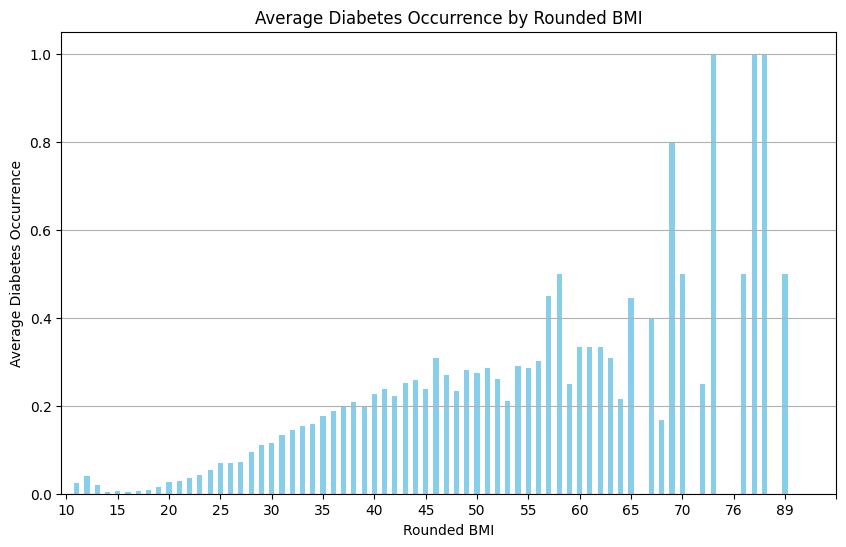

In [242]:
# Group the data by rounded BMI and calculate the average diabetes occurrence for each rounded BMI value
data['rounded_bmi'] = np.round(data['bmi']).astype(int)
avg_diabetes_by_bmi = data.groupby('rounded_bmi')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_diabetes_by_bmi.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Rounded BMI')
plt.ylabel('Average Diabetes Occurrence')
plt.title('Average Diabetes Occurrence by Rounded BMI')

# Show plot
plt.grid(axis='y')
plt.xticks(np.arange(0, 80, 5), rotation=0)
plt.xticks(rotation=0)
plt.show()


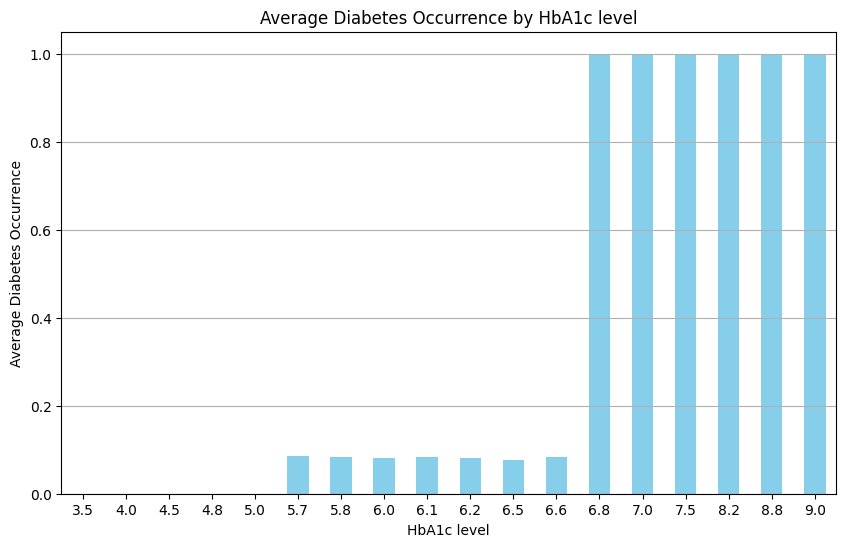

In [250]:
# Group the data by hba1c level and calculate the average diabetes occurrence for each hba1c level value
avg_diabetes_by_hba1c = data.groupby('HbA1c_level')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_diabetes_by_hba1c.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('HbA1c level')
plt.ylabel('Average Diabetes Occurrence')
plt.title('Average Diabetes Occurrence by HbA1c level')

# Show plot
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


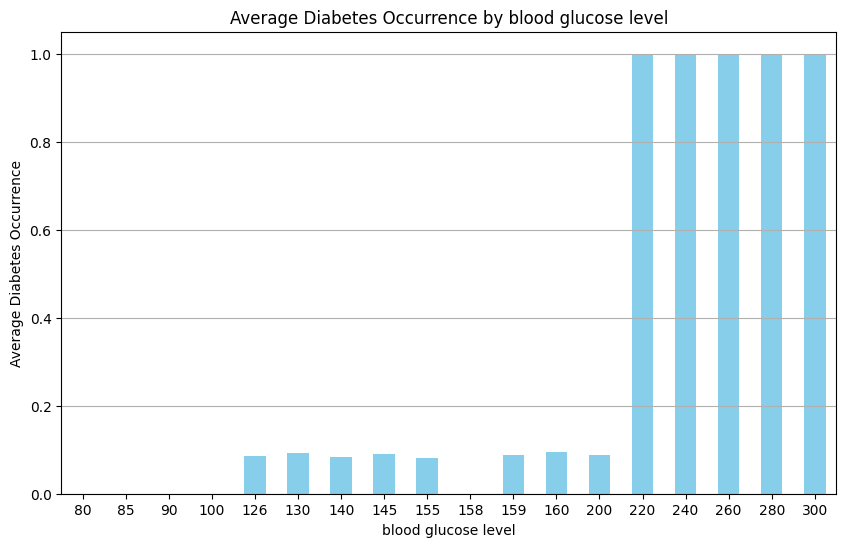

In [251]:
# Group the data by blood glucose level and calculate the average diabetes occurrence for each blood glucose level value
avg_diabetes_by_blood_glucose = data.groupby('blood_glucose_level')['diabetes'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_diabetes_by_blood_glucose.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('blood glucose level')
plt.ylabel('Average Diabetes Occurrence')
plt.title('Average Diabetes Occurrence by blood glucose level')

# Show plot
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [243]:
# Calculate the correlation coefficient for BMI to HbA1c and blood glucose level

bmi = data["bmi"]
hba1c = data["HbA1c_level"]
blood_glucose = data["blood_glucose_level"]

correlation_coefficient_bmi_hba1c = st.pearsonr(bmi, hba1c)
print(f"The correlation between bmi and the HbA1c level is {round(correlation_coefficient_bmi_hba1c[0],2)}")

correlation_coefficient_bmi_blood_glucose = st.pearsonr(bmi, blood_glucose)
print(f"The correlation between bmi and the blood glucose level is {round(correlation_coefficient_bmi_blood_glucose[0],2)}")

The correlation between bmi and the HbA1c level is 0.08
The correlation between bmi and the blood glucose level is 0.09


In [244]:
from scipy.stats import pointbiserialr

# Calculate correlation of BMI and diabetes instance

# Extract BMI and diabetes columns
diabetes = data["diabetes"]

# Calculate the point-biserial correlation coefficient and p-value
correlation, p_value = pointbiserialr(bmi, diabetes)

# Print the correlation coefficient and p-value
print("BMI vs Diabetes Point-biserial correlation coefficient:", correlation)
print("BMI vs Diabetes p-value:", p_value)

# Now for diabetes vs blood glucose

correlation, p_value = pointbiserialr(blood_glucose, diabetes)
print("Blood glucose vs Diabetes Point-biserial correlation coefficient:", correlation)
print("Blood glucose vs Diabetes p-value:", p_value)

# Now for diabetes vs HbA1c level

correlation, p_value = pointbiserialr(hba1c, diabetes)
print("HBA1C vs Diabetes Point-biserial correlation coefficient:", correlation)
print("HBA1C vs Diabetes p-value:", p_value)

BMI vs Diabetes Point-biserial correlation coefficient: 0.21493169995887615
BMI vs Diabetes p-value: 0.0
Blood glucose vs Diabetes Point-biserial correlation coefficient: 0.42433583557906784
Blood glucose vs Diabetes p-value: 0.0
HBA1C vs Diabetes Point-biserial correlation coefficient: 0.4064083758294869
HBA1C vs Diabetes p-value: 0.0


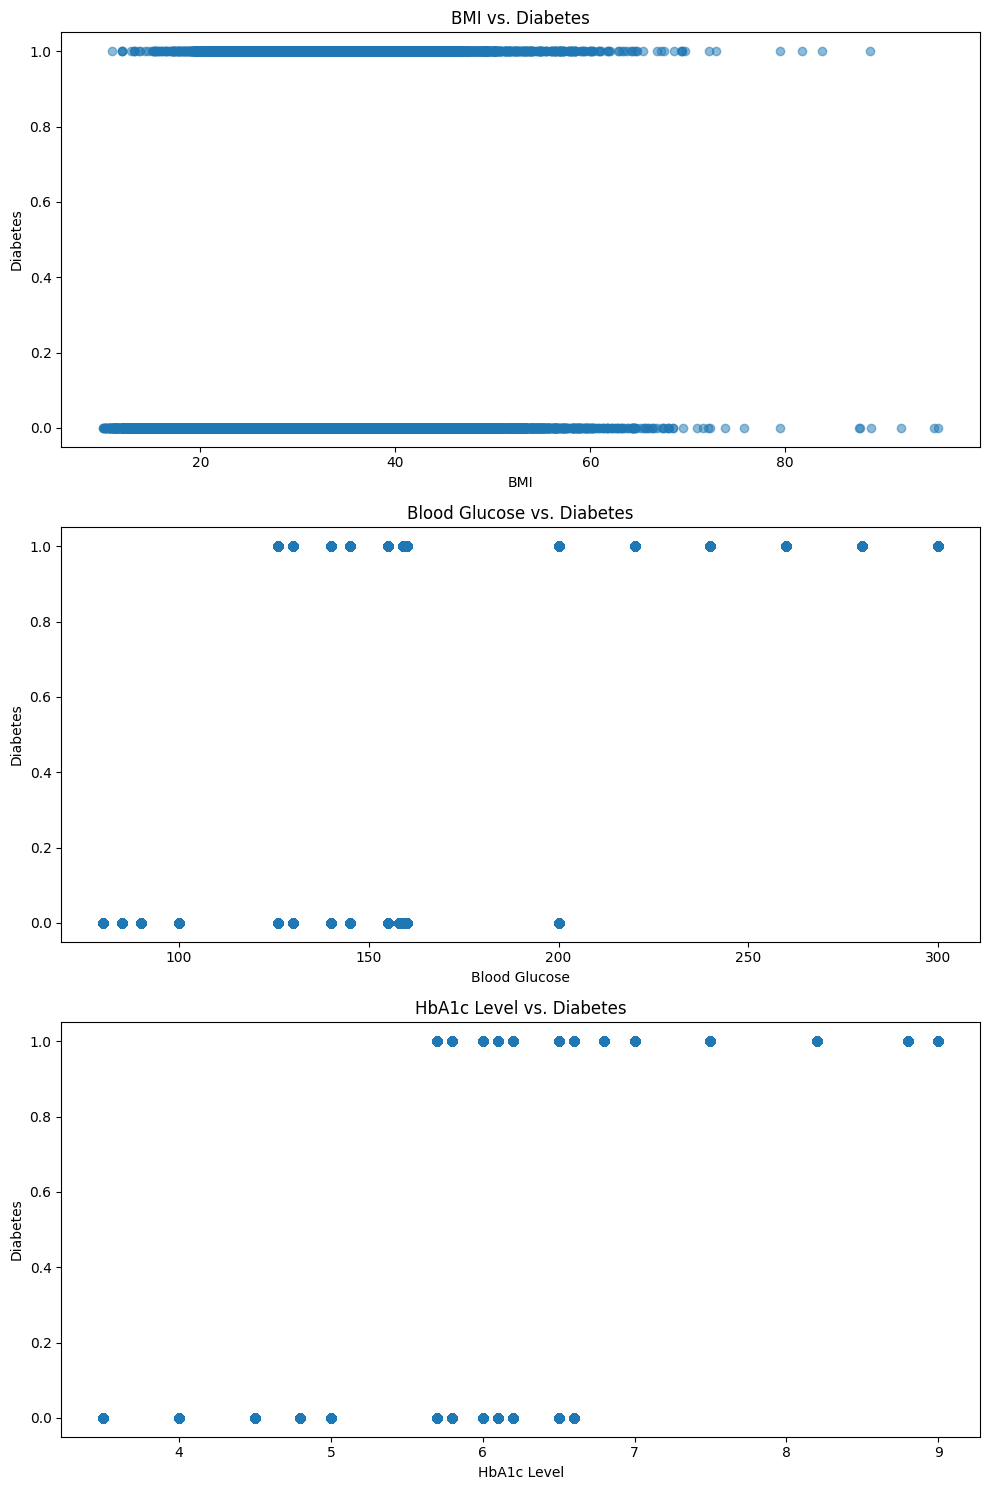

In [247]:
import matplotlib.pyplot as plt

# Set up the figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot BMI vs. Diabetes
axes[0].scatter(bmi, diabetes, alpha=0.5)
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Diabetes')
axes[0].set_title('BMI vs. Diabetes')

# Plot Blood Glucose vs. Diabetes
axes[1].scatter(blood_glucose, diabetes, alpha=0.5)
axes[1].set_xlabel('Blood Glucose')
axes[1].set_ylabel('Diabetes')
axes[1].set_title('Blood Glucose vs. Diabetes')

# Plot HbA1c Level vs. Diabetes
axes[2].scatter(hba1c, diabetes, alpha=0.5)
axes[2].set_xlabel('HbA1c Level')
axes[2].set_ylabel('Diabetes')
axes[2].set_title('HbA1c Level vs. Diabetes')

# Show the plot
plt.tight_layout()
plt.show()


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Prepare the data
X = data[['HbA1c_level', 'blood_glucose_level']]  # Predictor variables (HbA1c and blood glucose)
y = data['diabetes']  # Outcome variable (diabetes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model with HbA1c as predictor
logreg_hba1c = LogisticRegression()
logreg_hba1c.fit(X_train[['HbA1c_level']], y_train)

# Fit logistic regression model with blood glucose as predictor
logreg_bg = LogisticRegression()
logreg_bg.fit(X_train[['blood_glucose_level']], y_train)

# Predict probabilities of diabetes for test set using each model
y_pred_proba_hba1c = logreg_hba1c.predict_proba(X_test[['HbA1c_level']])[:, 1]
y_pred_proba_bg = logreg_bg.predict_proba(X_test[['blood_glucose_level']])[:, 1]

# Evaluate model performance
print("HbA1c Model:")
print("AUC:", roc_auc_score(y_test, y_pred_proba_hba1c))
print(classification_report(y_test, (y_pred_proba_hba1c >= 0.5).astype(int)))
print("\nBlood Glucose Model:")
print("AUC:", roc_auc_score(y_test, y_pred_proba_bg))
print(classification_report(y_test, (y_pred_proba_bg >= 0.5).astype(int)))


HbA1c Model:
AUC: 0.8395235865914263
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17509
           1       1.00      0.30      0.47      1721

    accuracy                           0.94     19230
   macro avg       0.97      0.65      0.72     19230
weighted avg       0.94      0.94      0.92     19230


Blood Glucose Model:
AUC: 0.7873022487082181
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17509
           1       1.00      0.31      0.47      1721

    accuracy                           0.94     19230
   macro avg       0.97      0.66      0.72     19230
weighted avg       0.94      0.94      0.92     19230



In [176]:
hba1c = data["HbA1c_level"]
glucose = data["blood_glucose_level"]
diabetes = data["diabetes"]
age = data["age"]
bmi = data["bmi"]

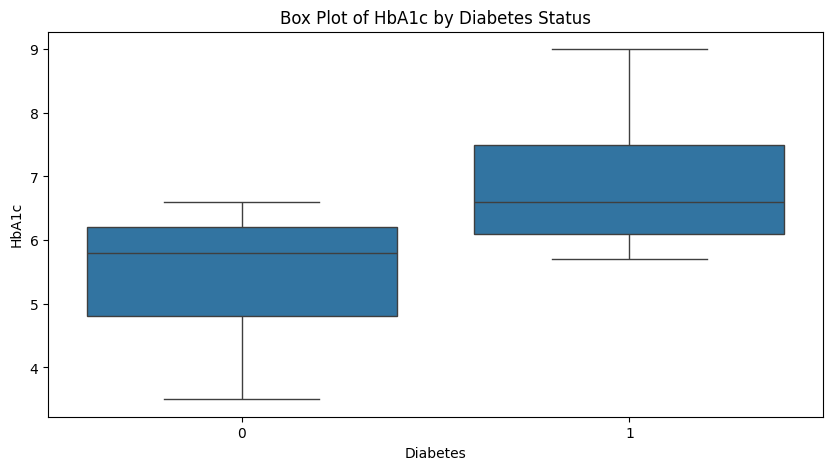

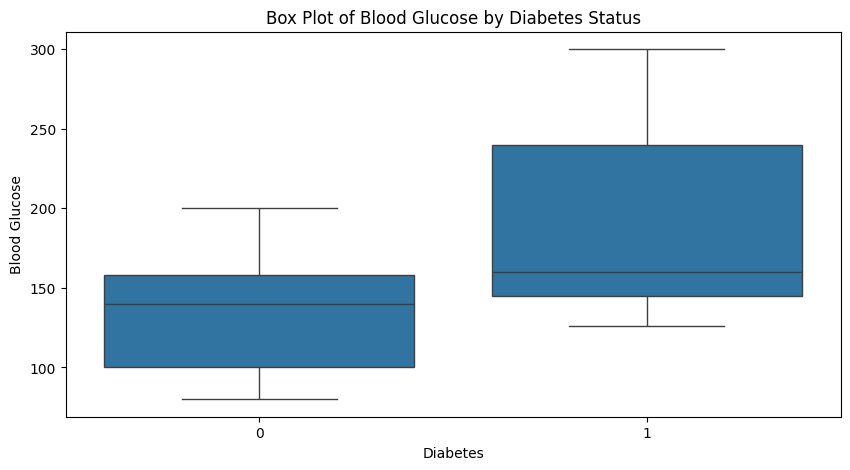

In [177]:
plt.figure(figsize=(10, 5))
sn.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.xlabel('Diabetes')
plt.ylabel('HbA1c')
plt.title('Box Plot of HbA1c by Diabetes Status')
plt.show()

# Box plot for blood glucose
plt.figure(figsize=(10, 5))
sn.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose')
plt.title('Box Plot of Blood Glucose by Diabetes Status')
plt.show()

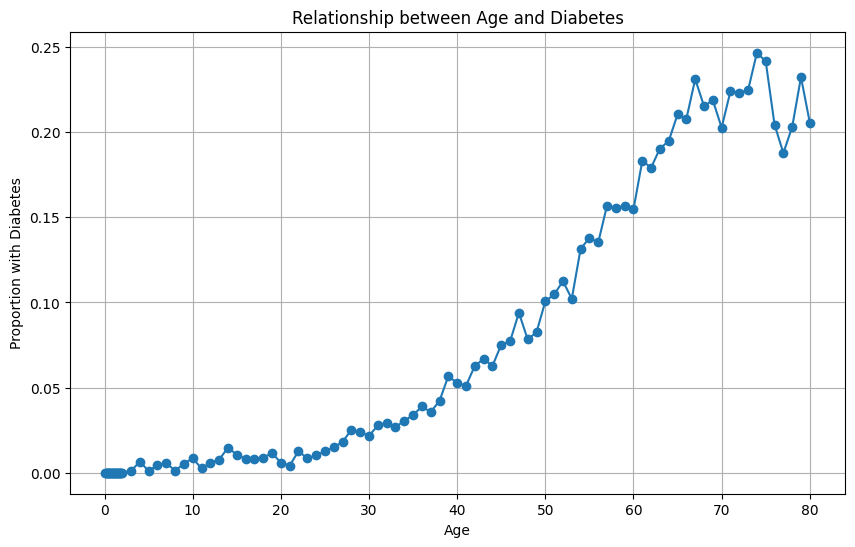

In [173]:
age_diabetes_proportion = data.groupby('age')['diabetes'].mean()

# Plot the relationship between age and proportion of individuals with diabetes
plt.figure(figsize=(10, 6))
plt.plot(age_diabetes_proportion.index, age_diabetes_proportion.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Proportion with Diabetes')
plt.title('Relationship between Age and Diabetes')
plt.grid(True)
plt.show()

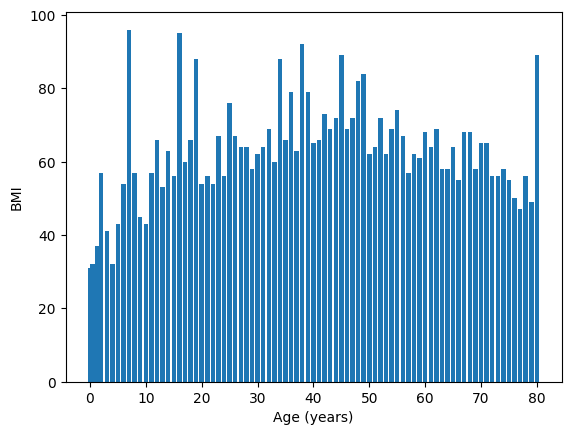

In [267]:
plt.bar(data["age"], data["rounded_bmi"])
plt.xlabel("Age (years)")
plt.ylabel("BMI")
plt.show()

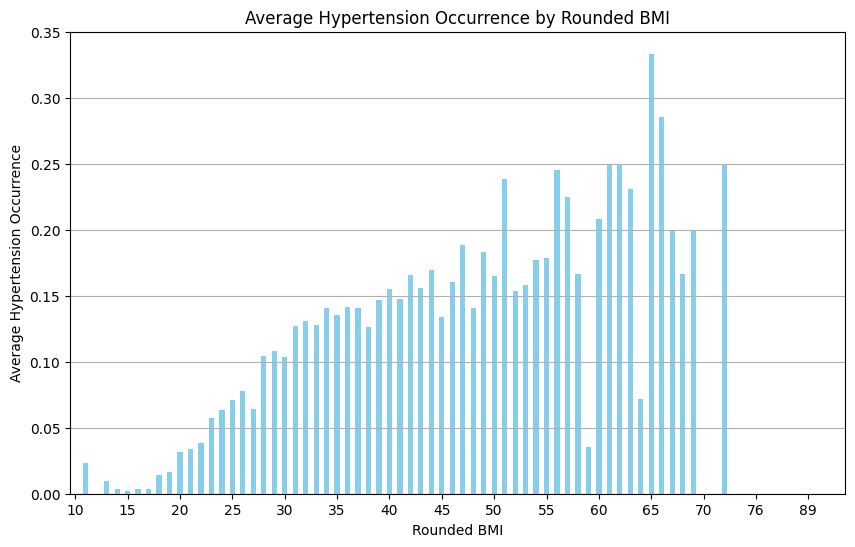

In [266]:
# Group the data by rounded BMI and calculate the average diabetes occurrence for each rounded BMI value
data['rounded_bmi'] = np.round(data['bmi']).astype(int)
avg_hypertension_by_bmi = data.groupby('rounded_bmi')['hypertension'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_hypertension_by_bmi.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Rounded BMI')
plt.ylabel('Average Hypertension Occurrence')
plt.title('Average Hypertension Occurrence by Rounded BMI')

# Show plot
plt.grid(axis='y')
plt.xticks(np.arange(0, 75, 5), rotation=0)
plt.xticks(rotation=0)
plt.show()


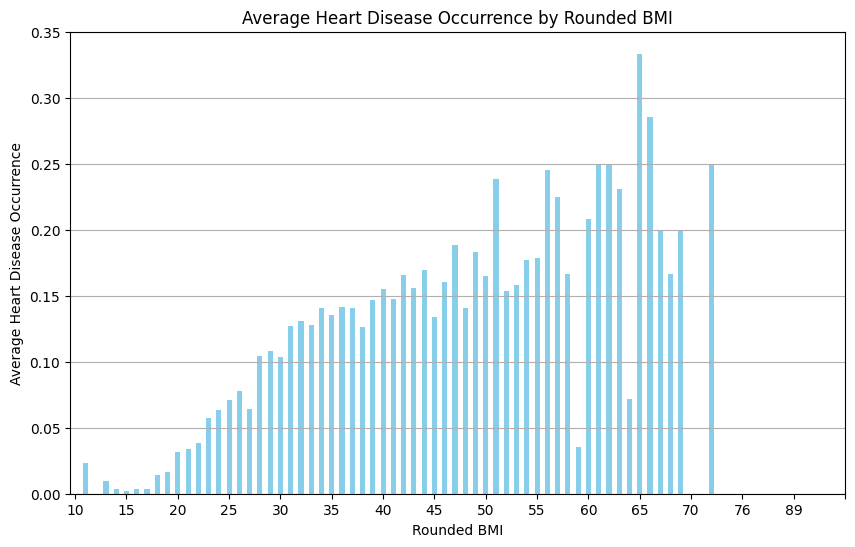

In [254]:
# Group the data by rounded BMI and calculate the average diabetes occurrence for each rounded BMI value
data['rounded_bmi'] = np.round(data['bmi']).astype(int)
avg_heartdisease_by_bmi = data.groupby('rounded_bmi')['heart_disease'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
avg_hypertension_by_bmi.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Rounded BMI')
plt.ylabel('Average Heart Disease Occurrence')
plt.title('Average Heart Disease Occurrence by Rounded BMI')

# Show plot
plt.grid(axis='y')
plt.xticks(np.arange(0, 80, 5), rotation=0)
plt.xticks(rotation=0)
plt.show()
